###**Data Science and Business Analytics(GRIP June 2021)**

####**Task 2 : Prediction using Unsupervised ML**
####**Author : Anjalina Tirkey**

**Problem Statement :** **From the given ‘Iris’ dataset, predict the optimum** **number of clusters and represent it visually.**

####**Importing required libraries**

In [169]:
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

####**Loading the Datasets**

In [186]:
df = pd.read_csv('/content/Iris.csv')

####**Exploratory Data Analysis**

In [187]:
df.head()              #shows first five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [188]:
df.describe()        #statistical represation of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [189]:
df.shape         #checking for numbers of rows and columns

(150, 6)

In [190]:
df.info()     #gives the summarize data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [191]:
df.isnull().any()       #checking for any null value

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [192]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

####**Data Visualization**

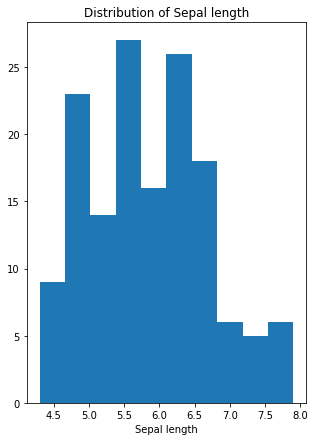

In [193]:
plt.figure(figsize=(5,7))
plt.hist(df['SepalLengthCm'])
plt.title('Distribution of Sepal length')
plt.xlabel('Sepal length')
plt.show()

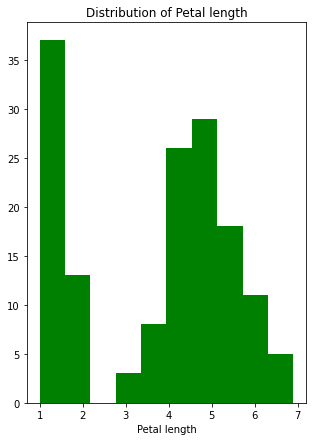

In [194]:
plt.figure(figsize=(5,7))
plt.hist(df['PetalLengthCm'],color = 'green')
plt.title('Distribution of Petal length')
plt.xlabel('Petal length')
plt.show()

In [195]:
group_names = df['Species'].unique().tolist()
group_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

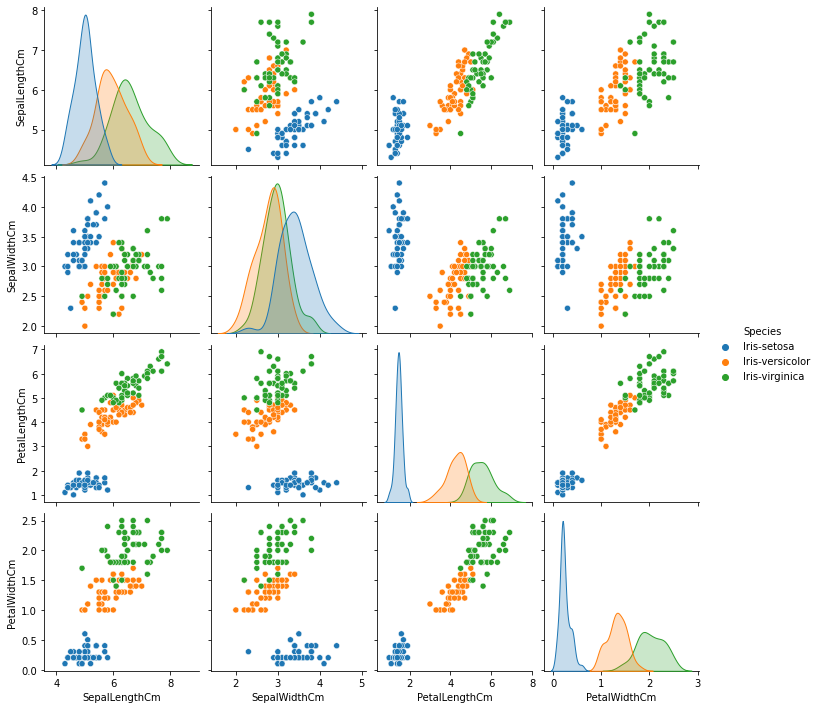

In [196]:
sns.pairplot(df.drop("Id", axis=1), hue="Species")
plt.show()

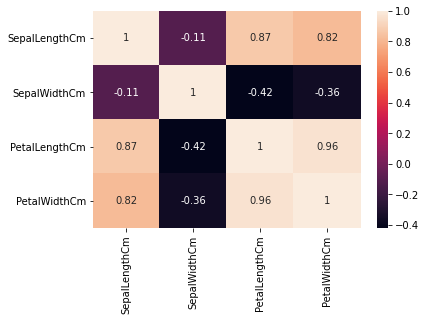

In [197]:
no_id = df.copy()
no_id.drop("Id", axis = 1, inplace = True)
sns.heatmap(data = no_id.corr(), annot = True)  #shows the correlation relationship between variables
plt.show()      

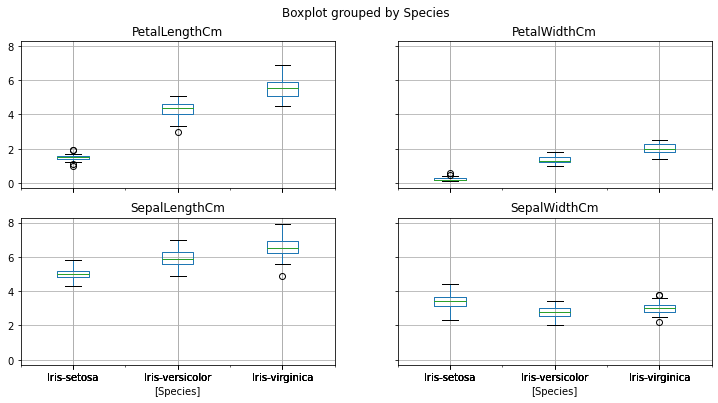

In [198]:
df.drop("Id", axis=1).boxplot(by = "Species", figsize=(12, 6))
plt.show()

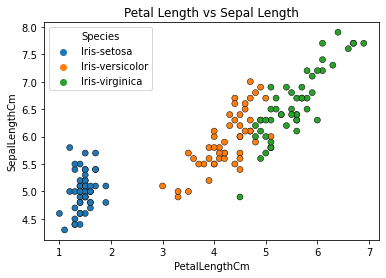

In [218]:
#PetalLength vs SepalLength
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalLengthCm',edgecolor='k', data = df ,hue ='Species')
plt.title('Petal Length vs Sepal Length')
plt.show()

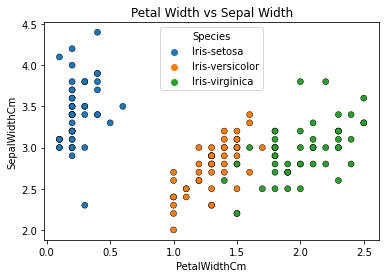

In [217]:
#PetalWidth vs SepalWidth
sns.scatterplot(x = 'PetalWidthCm', y = 'SepalWidthCm',edgecolor='k', data = df ,hue ='Species')
plt.title('Petal Width vs Sepal Width')
plt.show()

####**Finding the optimum numbers of clusters for k-means classification.**

In [201]:
x = df.iloc[:, [1,2,3,4]].values

In [202]:
#using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []                              # Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**WCSS** is defined as the sum of the squared distance between each member of the cluster and its centroid.

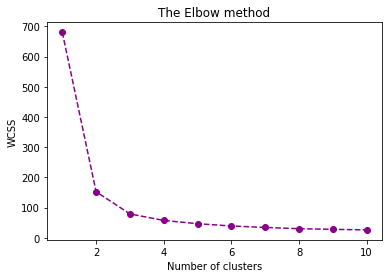

In [203]:
#Plotting the results onto a line graph
plt.plot(range(1, 11), wcss, "go--", c ='darkmagenta')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

**We can clearly state from the above graph that the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.**

Let us take the number of clusters  = 3



In [204]:
#Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

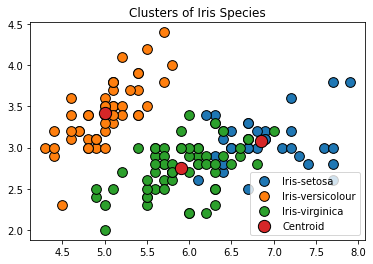

In [216]:
#Visualising the clusters

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 95, edgecolor='k', cmap = 'summer', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 95, edgecolor='k', cmap = 'summer', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 95, edgecolor='k', cmap = 'summer', label = 'Iris-virginica')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], s = 150, edgecolor='k', cmap ='summer', label = 'Centroid')
                                                                
plt.title('Clusters of Iris Species')
plt.legend()
plt.show()

In [208]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [210]:
X = iris.data[:, :2]
y = iris.target
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Predicted')

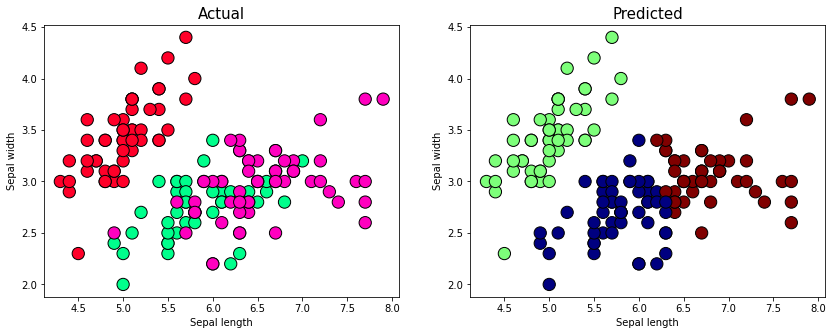

In [221]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='gist_rainbow', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, edgecolor='k', cmap='jet', s=150)
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[1].set_xlabel('Sepal length')
axes[1].set_ylabel('Sepal width')

axes[0].set_title('Actual', fontsize=15)
axes[1].set_title('Predicted', fontsize=15)

In [222]:
#Checking for Accuracy
#GaussainNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X = df.iloc[:, :-1].values            #independent var
y = df.iloc[:, -1].values             #dependent var
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [223]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))


accuracy is 1.0


The **accuracy** of this datadet is **100%**